classic titanic classification problem available at [kaggle](https://www.kaggle.com/c/titanic/data)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


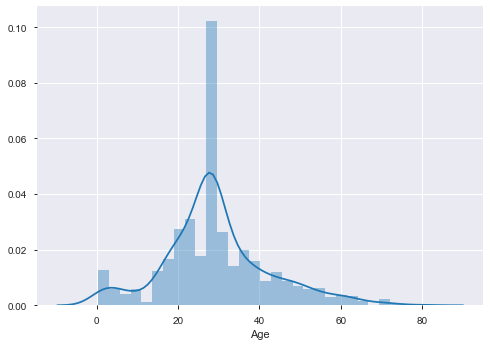

In [95]:
sns.distplot(train['Age'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


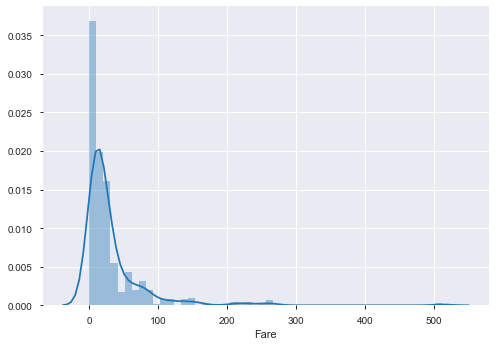

In [96]:
sns.distplot(train['Fare'])
plt.show()

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [47]:
def cabin_process(s):
    if s == "Null":
        return 'na'
    if s.startswith("F G"):
        return "F G"
    if s.startswith("F E"):
        return "F E"
    return s[0]

In [90]:
train['Cabin'] = train['Cabin'].fillna("Null")
train['Embark'] = train['Embarked'].fillna("S")
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Cabin_class'] = train['Cabin'].apply(cabin_process)
train['Ticket_class'] = train['Ticket'].str[0]
train['Title'] = train['Name'].str.split(',').apply(lambda x:x[1].split('.')[0]).str.strip()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


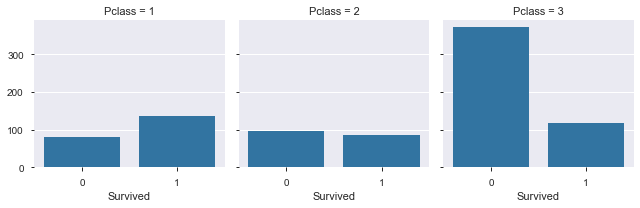

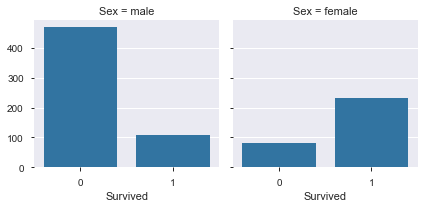

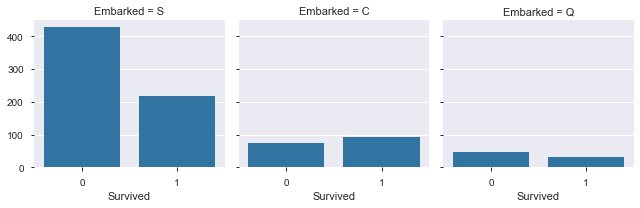

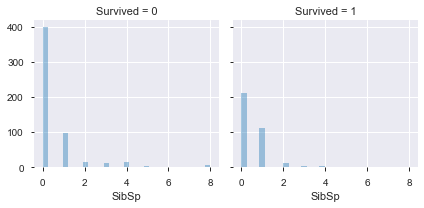

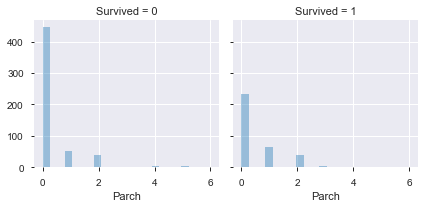

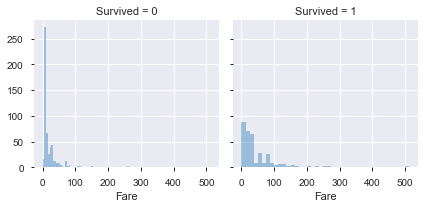

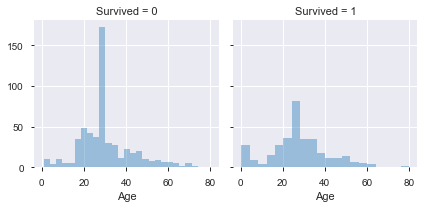

In [115]:
g = sns.FacetGrid(train, col='Pclass')
g.map(sns.countplot, 'Survived')

g = sns.FacetGrid(train, col='Sex')
g.map(sns.countplot, 'Survived')

g = sns.FacetGrid(train, col='Embarked')
g.map(sns.countplot, 'Survived')

g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


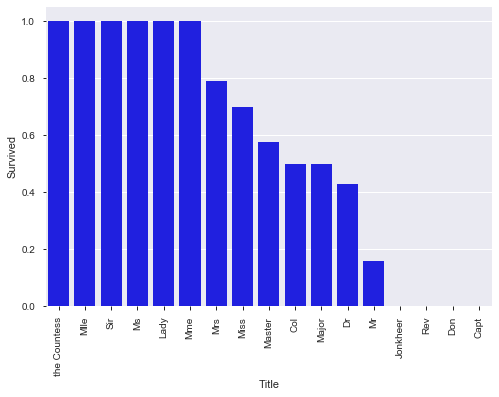

In [137]:
data = train.groupby('Title')['Survived'].mean().reset_index()
sns.barplot(x='Title', 
            y='Survived', 
            data = data,
            order = data.sort_values(by='Survived', ascending=False)['Title'],
            color='b'
           )
plt.xticks(rotation=90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


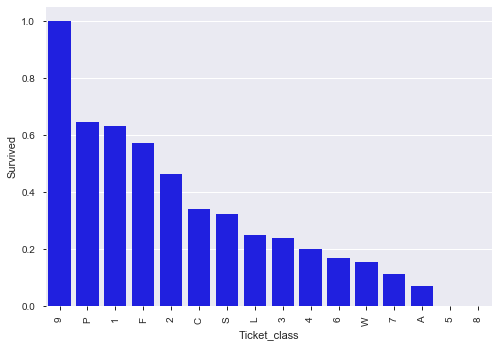

In [138]:
data = train.groupby('Ticket_class')['Survived'].mean().reset_index()
sns.barplot(x='Ticket_class', 
            y='Survived', 
            data = data,
            order = data.sort_values(by='Survived', ascending=False)['Ticket_class'],
            color='b'
           )
plt.xticks(rotation=90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


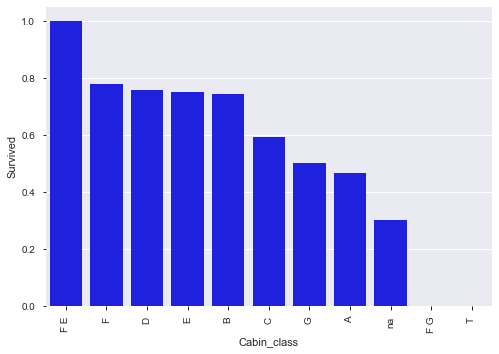

In [139]:
data = train.groupby('Cabin_class')['Survived'].mean().reset_index()
sns.barplot(x='Cabin_class', 
            y='Survived', 
            data = data,
            order = data.sort_values(by='Survived', ascending=False)['Cabin_class'],
            color='b'
           )
plt.xticks(rotation=90)
plt.show()